Introducción
Ya conoces Python. Ahora sabes cómo preparar datos para el análisis, estudiar relaciones usando métodos estadísticos y trazar gráficos. Es hora de abordar el machine learning. Te daremos una tarea empresarial y entrenarás un modelo para resolverla.

Empezarás por:

- Aprender terminología básica de machine learning
- Descubrir qué es el aprendizaje supervisado y aprender los tipos de ejercicios que existen
- Explorar la librería Scikit-learn
- Entrenar tu primer modelo

¿Cuánto tiempo tomará?
Diez lecciones de 5-10 minutos cada una.

Descripción del ejercicio

Los posibles compradores de bienes raíces recurren con frecuencia a los servicios en línea porque desean encontrar una buena oferta. Por supuesto, al mismo tiempo, el objetivo de los vendedores es vender su propiedad al precio más alto posible. Además, el servicio en línea que ayuda a conectar a compradores y vendedores obviamente desea obtener ganancias (incluso si el margen no es alto). Uno de esos servicios notó que muchas veces los vendedores no fijan el precio de su propiedad de acuerdo con el valor de mercado, y que estos precios más altos frustraron a los posibles compradores. ¿Será posible eliminar el factor humano y fijar el precio de los artículos de forma automática mediante machine learning? Vamos a averiguarlo.

Descripción del ejercicio empresarial

Comprender el ejercicio es la mitad de la solución. Veamos lo que se debe hacer y descubramos cómo resolver el problema.

Imagina que estás trabajando en una plataforma de listas de bienes raíces. En lugar de utilizar los servicios de la agencia mobiliaria , los propietarios envían sus propias listas y los compradores pueden responderles directamente. Si una transacción se realiza con éxito, la plataforma se lleva una comisión.

Los análisis de sitios web mostraron que, con frecuencia, los propietarios no basan sus precios en el valor de mercado. Esta práctica siempre es mala para el sitio web; como resultado, las propiedades económicas se venden rápidamente, pero la comisión de la plataforma también es menor. Por otro lado, las propiedades sobrevaloradas rara vez se venden, lo que significa que no hay ninguna ganancia. El servicio necesita animar a los vendedores a fijar el precio de su propiedad de acuerdo con su valor de mercado. Necesitamos encontrar un algoritmo para ayudar a los propietarios a determinar el precio correcto.

Para resolver este problema, deberás trabajar con los expertos para crear las reglas de precios. Por ejemplo:

Multiplicar el área del apartamento por el precio promedio de la ciudad por m²
Disminuir el precio en un 20 % si el apartamento se remodeló hace más de 3 años
Incrementar el precio en un 30 % si hay una estación de metro cerca
El número de reglas posibles es ilimitado.

Pero eso no es todo. Un "algoritmo experto" podría ser una ventaja competitiva o una característica costosa e inútil. Las reglas también pueden ser difíciles de escalar (por ejemplo, al ingresar a otros mercados y regiones), por lo que con el tiempo pueden volverse irrelevantes.

El machine learning te ayudará a superar las deficiencias de las reglas expertas.

Dataset para el entrenamiento

Descartaste a los expertos. El programa resolverá la tarea en cuanto terminemos de entrenarlo.

En realidad, los programas y los expertos se capacitan de manera similar: recopilan y clasifican conocimientos, descubren dependencias y adquieren experiencia. Tanto el aprendizaje humano como el machine learning incluyen alguna forma de estudiar la información. En el caso del machine learning, los modelos aprenden de conjuntos de datos de entrenamiento. 

Para esta tarea, vamos a utilizar los datos presentados por un mercado inmobiliario online. Para que esta sea adecuada para entrenar un modelo, hemos eliminado las variables que no afectan el precio, así como los valores faltantes y las propiedades que están fuera de los límites de la ciudad. El nombre del archivo es /datasets/train_ml.csv. ¡Vamos a descargarlo

import pandas as pd

df = pd.read_csv('/datasets/train_data_us.csv')

print(df.shape)
print(df.head(5))

Veamos los diferentes tipos de datos en nuestro conjunto de datos.

- last_price — precio al cierre (en dólares)
- total_area — superficie del apartamento en metros cuadrados (m²)
- bedrooms — número de dormitorios
- ceiling_height — altura del techo (m)
- floors_total — número total de pisos en el edificio
- living_area — superficie de sala de estar (m²)
- floor — piso
- bike_parking — estacionamiento de bicicletas en el edificio (tipo de dato booleano)
- is_studio — la propiedad es un estudio (tipo de dato booleano)
- is_open_plan — plan abierto (tipo de dato booleano)
- kitchen_area — área de cocina (m²)
- balconies — número de balcones
- airport_dist — distancia al aeropuerto más cercano en metros (m)
- city_center_dist — distancia al centro de la ciudad (m)

En el machine learning, las filas y columnas representan observaciones y características, respectivamente. La característica que necesitamos predecir se conoce como el objetivo. En esta tarea, el objetivo es last_price.


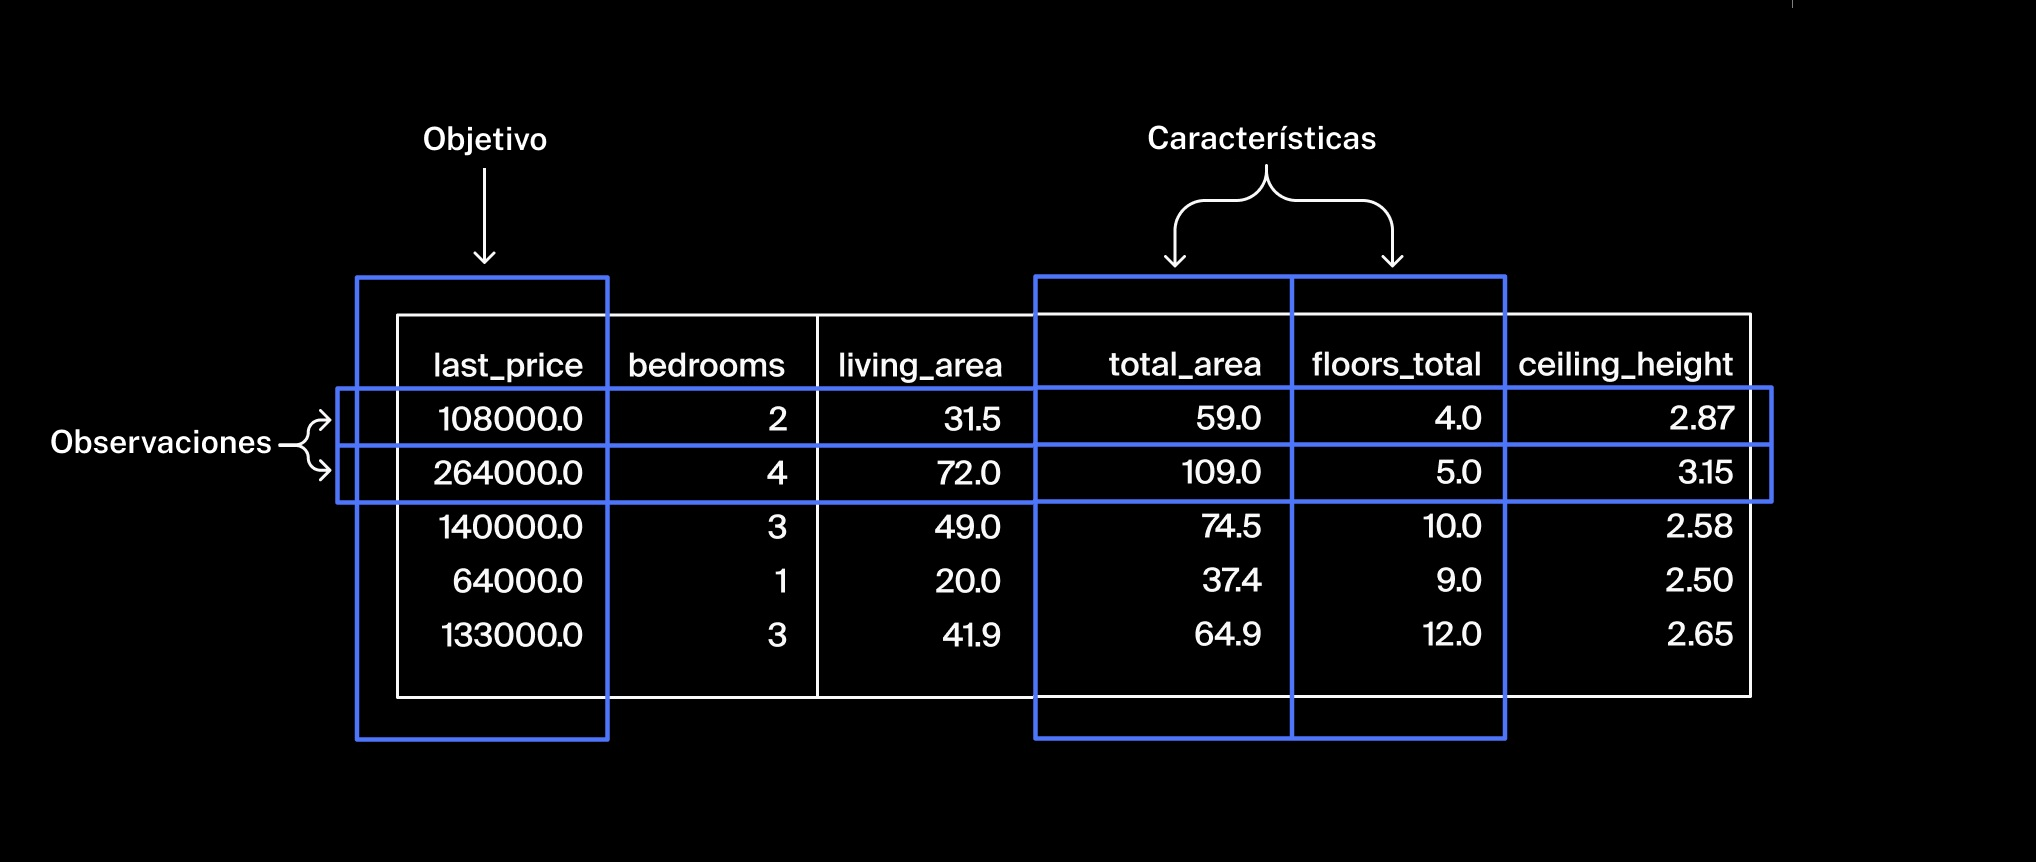

Aprendizaje supervisado

Existen distintas tareas de machine learning. Para desarrollar el algoritmo correcto, primero debes determinar el tipo de tarea.

Tienes un conjunto de datos de entrenamiento y una característica objetivo (precio de venta de la propiedad) que necesitas predecir usando el resto de las características. Esta es una tarea de aprendizaje supervisado. El "maestro" plantea preguntas (características) y da respuestas (el objetivo). No se da ninguna explicación sobre cómo las características conducen a la respuesta exactamente; la máquina tiene que resolverlo por sí misma. Con desafíos como estos, ¡no es de extrañar que en las películas ocurran levantamientos de IA todo el tiempo!

La mayor atención se centrará en el aprendizaje supervisado, ya que es adecuado para resolver muchas tareas comerciales. Más adelante, también abordaremos otras clases:

- Aprendizaje no supervisado: sin objetivo
- Aprendizaje semisupervisado: solo una parte de los datos de entrenamiento conoce el objetivo
- Recomendación: los usuarios y los elementos reemplazan las funciones y las observaciones 
(algo que puedas recomendar, por ejemplo, películas o vecindarios).

Pregunta

Identifica las tareas que pertenecen al aprendizaje supervisado:

Elige tantas como quieras

- Determinar si el usuario hará clic o no en el banner publicitario en función del contenido del sitio web y el historial de clics.
El contenido del sitio corresponde a características; hacer clic/no hacer clic es el objetivo y el historial de clics es nuestro conjunto de datos de entrenamiento. Todo está claro. La máquina te lo agradecerá.

x Dividir a los clientes del mercado online en grupos en función de su historial de compras.

x Determinar el orden de relevancia de los sitios web mostrados en los resultados de búsqueda.

- Identificar la edad de un usuario con base en el historial de compras. Tienes acceso al historial de compras de los clientes cuyas edades se conocen.
La lista de compras es una función, la edad es el objetivo y el historial de compras es el conjunto de datos de entrenamiento.

Bien, puedes quedarte con tu ropa, tus botas y tu motocicleta.

¡Buen trabajo!

Veamos los tipos de aprendizaje supervisado.

Todas las variables y características son categóricas o numéricas, y el objetivo no es una excepción.

Las tareas de clasificación se ocupan de objetivos categóricos (por ejemplo, determinar especies de animales en una imagen). Si solo tenemos dos categorías, por ejemplo, si un cliente volverá a visitar el sitio web o no, es una clasificación binaria.

Si el objetivo es numérico, entonces es una tarea de regresión. Los datos se utilizan para encontrar relaciones entre las variables y hacer predicciones basadas en la información, como el pronóstico de volumen de precipitaciones o la predicción de los precios del mercado de valores para los próximos días.

Pregunta

Tus colegas del trabajo te pidieron que pronosticaras la cantidad de cortadoras de verduras que se venderán el próximo mes. ¿Esta tarea es de regresión o clasificación?

- Regresión
No se necesita saber ingeniería aeroespacial para resolverlo. El objetivo es numérico.

Clasificación

¡Perfecto!
Pregunta

¡Tienes spam! O un correo normal. Antes de hacer conjeturas, decidamos si se trata de una tarea de regresión o de clasificación.

Regresión

- Clasificación

¡Felicidades! Tienes un objetivo categórico con solo dos opciones (spam/no spam), por lo que es una clasificación binaria.

¡Lo has entendido bien!

Pregunta

Debes identificar el dígito escrito a mano que se muestra en la imagen (del 0 al 9). ¿Es esta una tarea de regresión o de clasificación?

Regresión

- Clasificación

Es un objetivo categórico. Intentamos engañarte, pero no funcionó.

¡Perfecto!